In [ ]:
####################################################
#   PART 1: USE IN-BUILT LIBRARIES AND FUNCTIONS   #
####################################################

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 

# load csv data into dataframe
df = pd.read_csv('playTennis.csv', sep = ',')

# define encoder
encoder = LabelEncoder()

# convert string data to integer for ease of handling
for i in df.columns[1:]:
 df[i] = encoder.fit_transform(df[i])

# remove unwanted columns and split
# dataframe into input features and output
# features (labels)
del df['day']
Y = df['play'].to_numpy()
del df['play']
X = df.to_numpy()

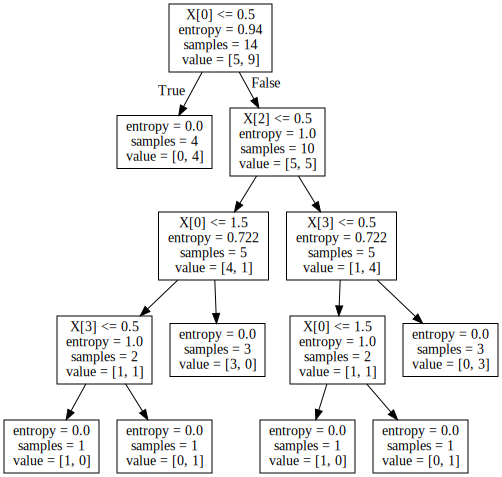

In [ ]:
# first tree, use entropy as the impurity parameter
tree1 = DecisionTreeClassifier(criterion = 'entropy')
tree1.fit(X,Y)

# diagrammatically show the tree
dot_data1 = export_graphviz(tree1, out_file=None) 
graph1 = graphviz.Source(dot_data1) 
graph1

In [ ]:
# predict on the given test set
tree1.predict([[2,0,0,1],[1,1,0,1]])

# output 0 -> No, output 1 -> Yes

array([0, 1])

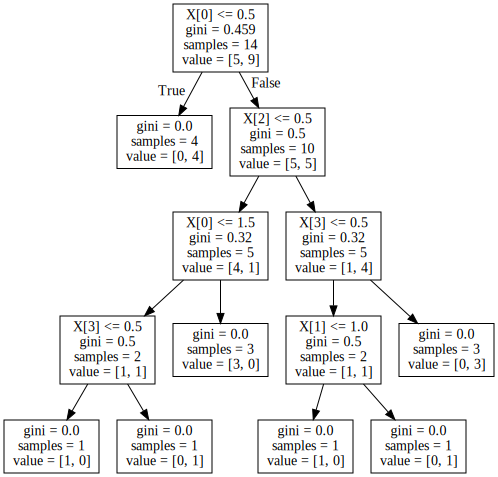

In [ ]:
# second tree, use GINI index as the impurity parameter
tree2 = DecisionTreeClassifier(criterion = 'gini')
tree2.fit(X,Y)

# diagrammatically show the tree
dot_data2 = export_graphviz(tree2, out_file=None) 
graph2 = graphviz.Source(dot_data2) 
graph2

In [ ]:
# predict on the given test set
tree2.predict([[2,0,0,1],[1,1,0,1]])

# output 0 -> No, output 1 -> Yes

array([0, 1])

In [ ]:
####################################################
#   PART 2: MAKE DECISION TREES FROM SCRATCH       #
####################################################

In [ ]:
import pandas as pd
import math

X = pd.read_csv("playTennis.csv")  # read file, convert to a dataframe
del X['day']  # drop unnecessary column

In [ ]:
def entropy(train_set):
    # below segment checks if entropy calculation is possible
    # checking purity of the set
    num_yes = sum(train_set['play'] == "Yes")
    num_no = len(train_set) - num_yes
    
    if num_yes == 0 or num_no == 0: return 0.0
    else: # apply formula of entropy 
        p = num_yes / (num_yes + num_no)
        return -p*math.log2(p) - (1 - p)*math.log2(1-p)

def info_gain(train_set, feature): # information gain criterion

    values = train_set[feature].unique()
    gain = entropy(train_set) # entropy of parent node
    # summation of weighted entropy of each value of the feature
    for value in values:
        temp = train_set[train_set[feature] == value]
        gain -= entropy(temp)*len(temp)/len(train_set)
    return gain

In [ ]:
def gini(train_set):
    # below segment checks if entropy calculation is possible
    # checking purity of the set  
    num_yes = sum(train_set['play'] == "Yes")
    num_no = len(train_set) - num_yes
    
    if num_yes == 0 or num_no == 0: return 0.0
    else: # apply formula of GINI 
        p = num_yes / (num_yes + num_no)
        return 1 - p**2 - (1-p)**2
    
def gini_split(train_set, feature): # GINI split criterion
    
    values = train_set[feature].unique()
    gain = gini(train_set) # GINI index of parent node
    # summation of weighted GINI of each value of the feature
    for value in values:
        temp = train_set[train_set[feature] == value]
        gain += gini(temp)*len(temp)/len(train_set)
    return gain

In [ ]:
# class to generate the decision tree
# relevant variables are declared to store critical data
class Node:
    def __init__(self,children,value,terminal,prediction):
        self.children = children
        self.value = value
        self.terminal = terminal
        self.prediction = prediction

# recursive function to generate tree from the training set
def build_tree(train_set, feature_set, criterion):
    
    root = Node([],None,False,None)
    temp_gain = 0
    temp_feat = None
    # in info-gain criterion, we choose the feature 
    # with highest purity value among all
    if criterion == "info_gain":
        temp_gain = -10000
        for feature in feature_set:
            gain = eval(criterion+"(train_set, feature)") # call info-gain method
            if gain > temp_gain:
                temp_gain = gain
                temp_feat = feature
    
    # in GINI index criterion, we choose the feature 
    # with lowest weighted-GINI value among all
    elif criterion == "gini_split":
        temp_gain = 10000
        for feature in feature_set:
            gain = eval(criterion+"(train_set, feature)") # call weighted-GINI method
            if gain < temp_gain:
                temp_gain = gain
                temp_feat = feature
            
    # update root node and retrieve values
    # corresponding to the chosen feature
    root.value = temp_feat
    values = train_set[temp_feat].unique()
    
    for value in values:
        
        temp = train_set[train_set[temp_feat] == value]
        # if we have reached the case of a terminal node,
        # declare the node as terminal
        if (criterion == "info_gain" and entropy(temp) == 0.0) \
        or (criterion == "gini_split" and gini(temp) == 0.0):
            child = Node([],value,True,temp['play'].unique()[0])
            root.children.append(child)
            
        else:
            # child node will actually have the feature value
            # the grandchild will actually propagate the tree forward
            child = Node([],value,False,None)
            
            # modify feature to prevent repeated use of same feature
            new_feature_set = feature_set.copy()
            new_feature_set.remove(temp_feat)
            
            grandchild = build_tree(temp, new_feature_set, criterion)
            child.children.append(grandchild)
            root.children.append(child)
            
    return root

# recursive method to draw prediction from given test data
def predict(root, test):
  
    # lowest depth of tree, decision is to be made
    if root.terminal:
        return root.prediction
    # intermediate node that only stores a feature value(child node)
    elif root.value not in features:
        return predict(root.children[0],test)
    # node that actually connects to further nodes(grandchild node)
    else:
        index = features.index(root.value)
        for child in root.children:    
            if child.value == test[index]:
                return predict(child,test)

In [ ]:
# execution point
features=[feat for feat in X]
features.remove('play')
root1 = build_tree(X, features, "info_gain")
root2 = build_tree(X, features, "gini_split")

# test cases
test1 = ["Sunny","Cool","High","Weak"]
test2 = ["Rain","Hot","High","Weak"]

# prediction in the case of information gain criterion
print("When info gain is criterion...")
print("Output Label for ",test1," is ", predict(root1,test1))
print("Output Label for ",test2," is ", predict(root1,test2))

print("\n")

# prediction in the case of GINI index criterion
print("When GINI split is criterion...")
print("Output Label for ",test1," is ", predict(root2,test1))
print("Output Label for ",test2," is ", predict(root2,test2))

When info gain is criterion...
Output Label for  ['Sunny', 'Cool', 'High', 'Weak']  is  No
Output Label for  ['Rain', 'Hot', 'High', 'Weak']  is  Yes


When GINI split is criterion...
Output Label for  ['Sunny', 'Cool', 'High', 'Weak']  is  No
Output Label for  ['Rain', 'Hot', 'High', 'Weak']  is  Yes
